# Object tracking by frame

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from vsers.detect_track.objectDetect import ObjectDetector
from vsers.detect_track.objectTrack import NearestTracker, ObjectDetectTracker
import numpy as np

detector = ObjectDetector()
tracker = NearestTracker()
detectTracker = OjectDetectTracker(detector, tracker)
detectTracker.set_cropped_rect(np.array([400,100,400,200]))

cap = cv2.VideoCapture('WIN_20200720_12_07_51_Pro.mp4')

while(True):
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    dic, coordinates, centroids, croppedInputColor, labels, image = detectTracker.detect(frame, plot = False)
    cv2.imshow('frame', image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

# Edge detection

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from vsers.edge_detection.edgeDetect import EdgeDetector
import numpy as np

detector = EdgeDetector()
detector.set_cropped_rect(np.array([0, 502, 1920, 182]))

cap = cv2.VideoCapture('MVI_3403.MOV')

while(True):

    ret, frame = cap.read()
    if not ret:
        break
    coordinates, centroids, croppedInputColor, image, _, fitFunction= detector.detect(frame, plot=False, 
                                                                                      filtering = True, fitting=True)
    cv2.imshow('frame', image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

/Users/zhengzhiwu/anaconda3/envs/SoftRoboticsTest/lib/python3.6/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


In [8]:
import matplotlib
matplotlib.rcParams.update({'font.size': 42})

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from vsers.edge_detection.edgeDetect import EdgeDetector
from vsers.utils.storage import Pickling

detector = EdgeDetector(minimum=655.0, maximum=690.0, fs=10.0)
detector.set_cropped_rect(np.array([0, 502, 1920, 182]))
storage = Pickling(filename='MVI_3403')
cap = cv2.VideoCapture('MVI_3403.MOV')

while(True):

    ret, frame = cap.read()
    if not ret:
        break
    coordinates, centroids, croppedInputColor, image, _, fit= detector.detect(frame, plot=False, 
                                                                              filtering = True, fitting=True)
    storage.store(coordinates=coordinates, centroids=centroids, image=image, fit=fit)

# When everything done, release the capture
storage.save()

In [8]:
import matplotlib
matplotlib.rcParams.update({'font.size': 42})

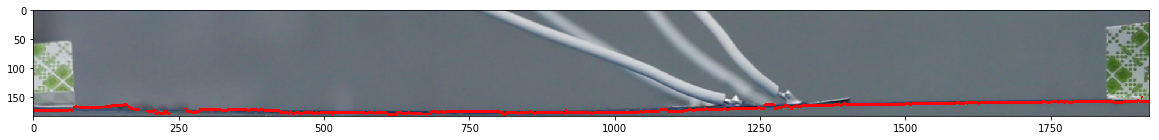

In [5]:
plt.figure(figsize=(20,15))
index = 350
plt.imshow(storage.dic[index]['image'])
coordinates = storage.dic[index]['coordinates']
centroids = storage.dic[index]['centroids']
fit_function = storage.dic[index]['fit'].fit_function
first_derivative = storage.dic[index]['fit'].first_derivative
second_derivative = storage.dic[index]['fit'].second_derivative
third_derivative = storage.dic[index]['fit'].third_derivative
fourth_derivative = storage.dic[index]['fit'].fourth_derivative
plt.show()

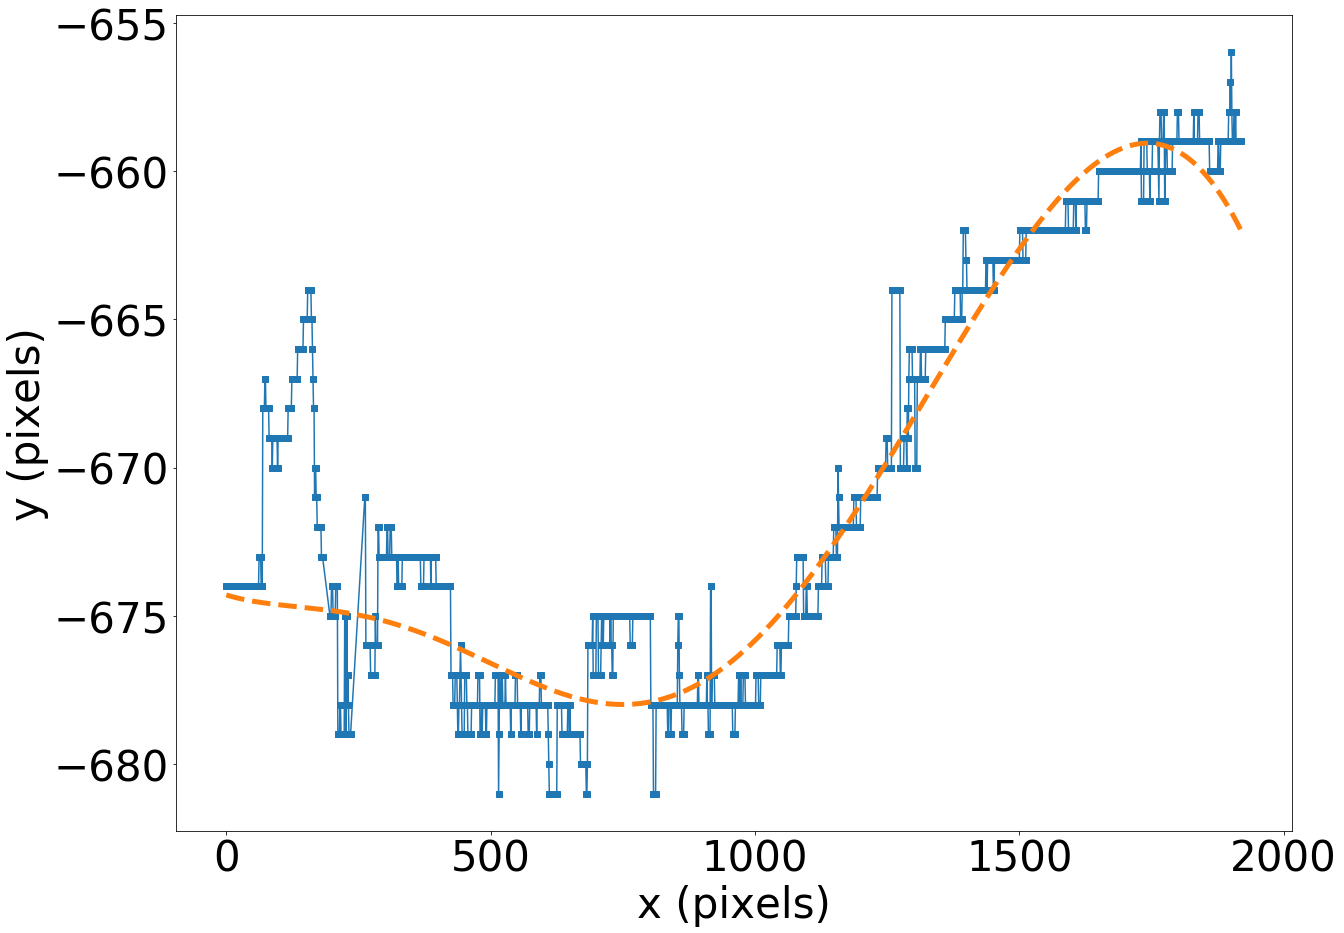

In [9]:
plt.figure(figsize=(20,15))
plt.plot(coordinates[:, 0], -coordinates[:, 1], "s-")
plt.plot(coordinates[:, 0], -np.array([fit_function(x) for x in coordinates[:, 0]]), "--", linewidth=5)
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")
plt.show()

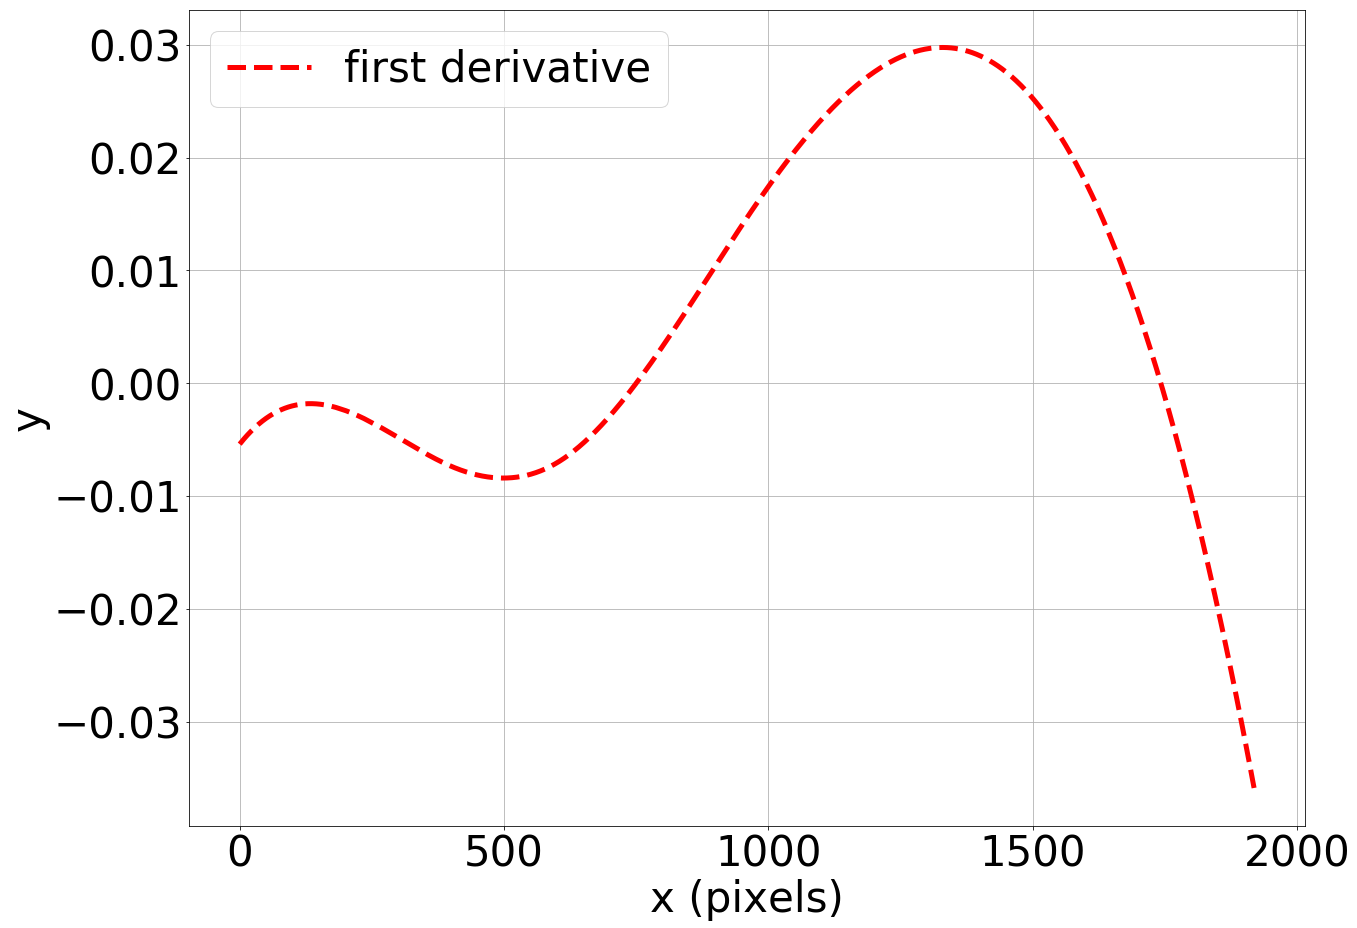

In [22]:
plt.figure(figsize=(20,15))
plt.plot(coordinates[:, 0], -np.array([first_derivative(x) for x in coordinates[:, 0]]), "r--", linewidth=5, 
        label="first derivative")
plt.legend()
plt.xlabel("x (pixels)")
plt.ylabel("y")
plt.grid()
plt.show()

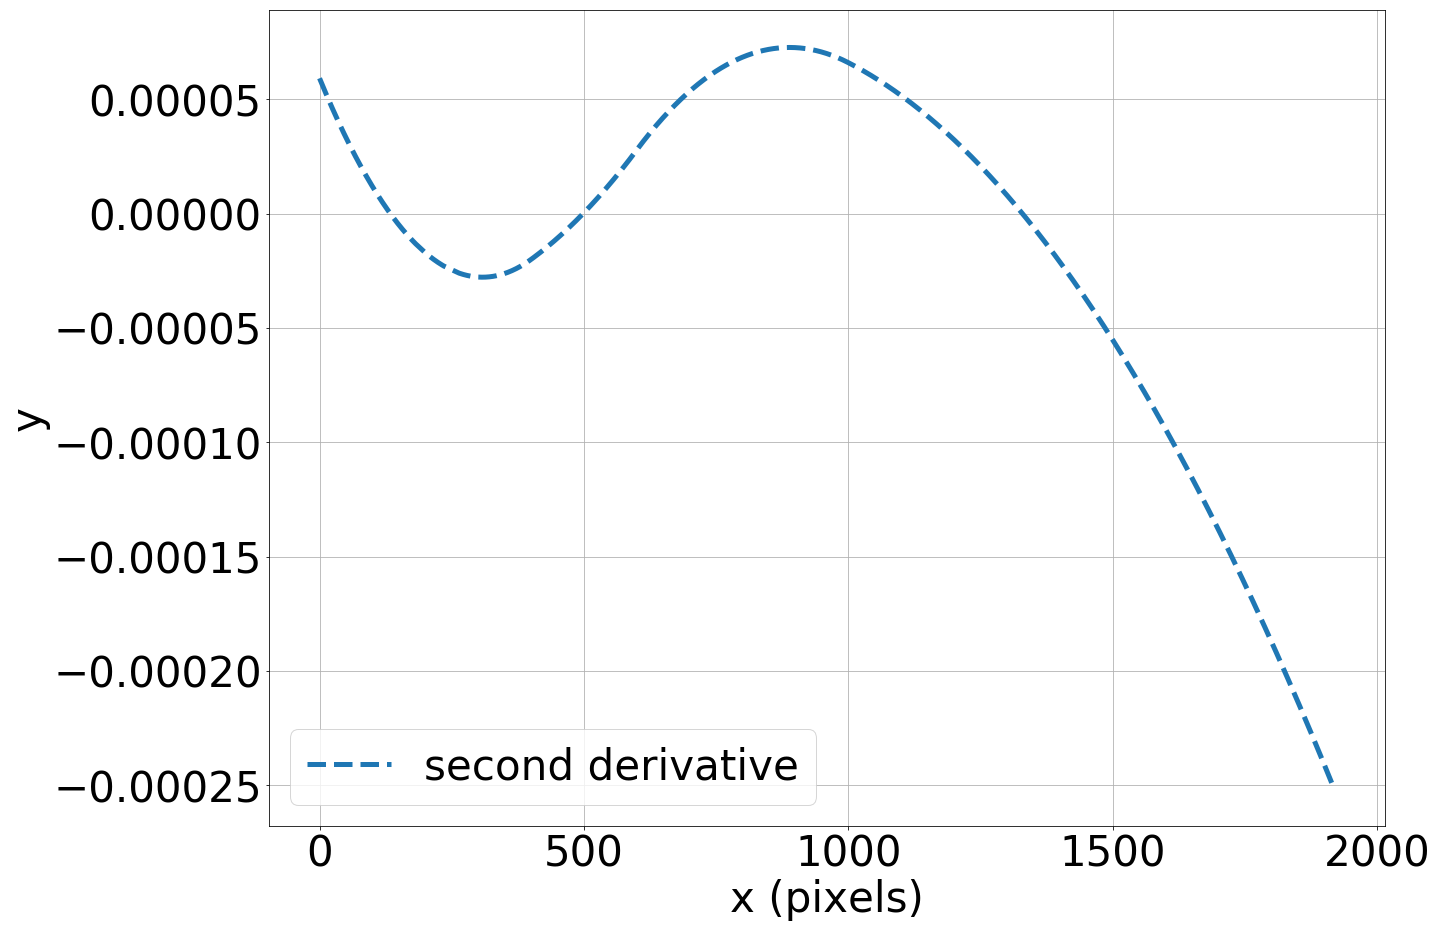

In [23]:
plt.figure(figsize=(20,15))

plt.plot(coordinates[:, 0], -np.array([second_derivative(x) for x in coordinates[:, 0]]), "--", linewidth=5, 
        label="second derivative")

plt.legend()
plt.xlabel("x (pixels)")
plt.ylabel("y")
plt.grid()
plt.show()

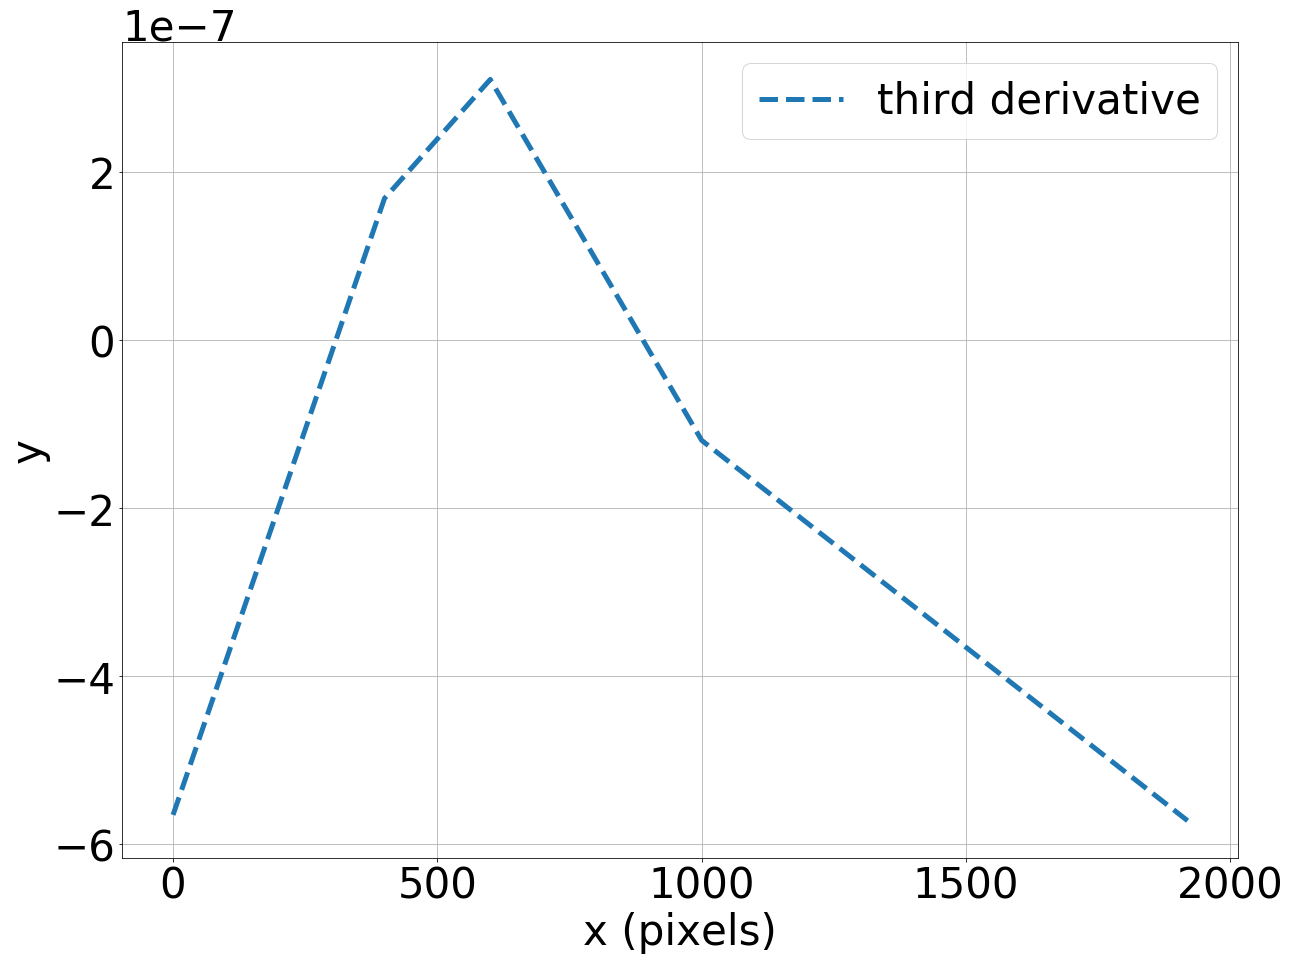

In [24]:
plt.figure(figsize=(20,15))

plt.plot(coordinates[:, 0], -np.array([third_derivative(x) for x in coordinates[:, 0]]), "--", linewidth=5, 
        label="third derivative")

plt.legend()
plt.xlabel("x (pixels)")
plt.ylabel("y")
plt.grid()
plt.show()

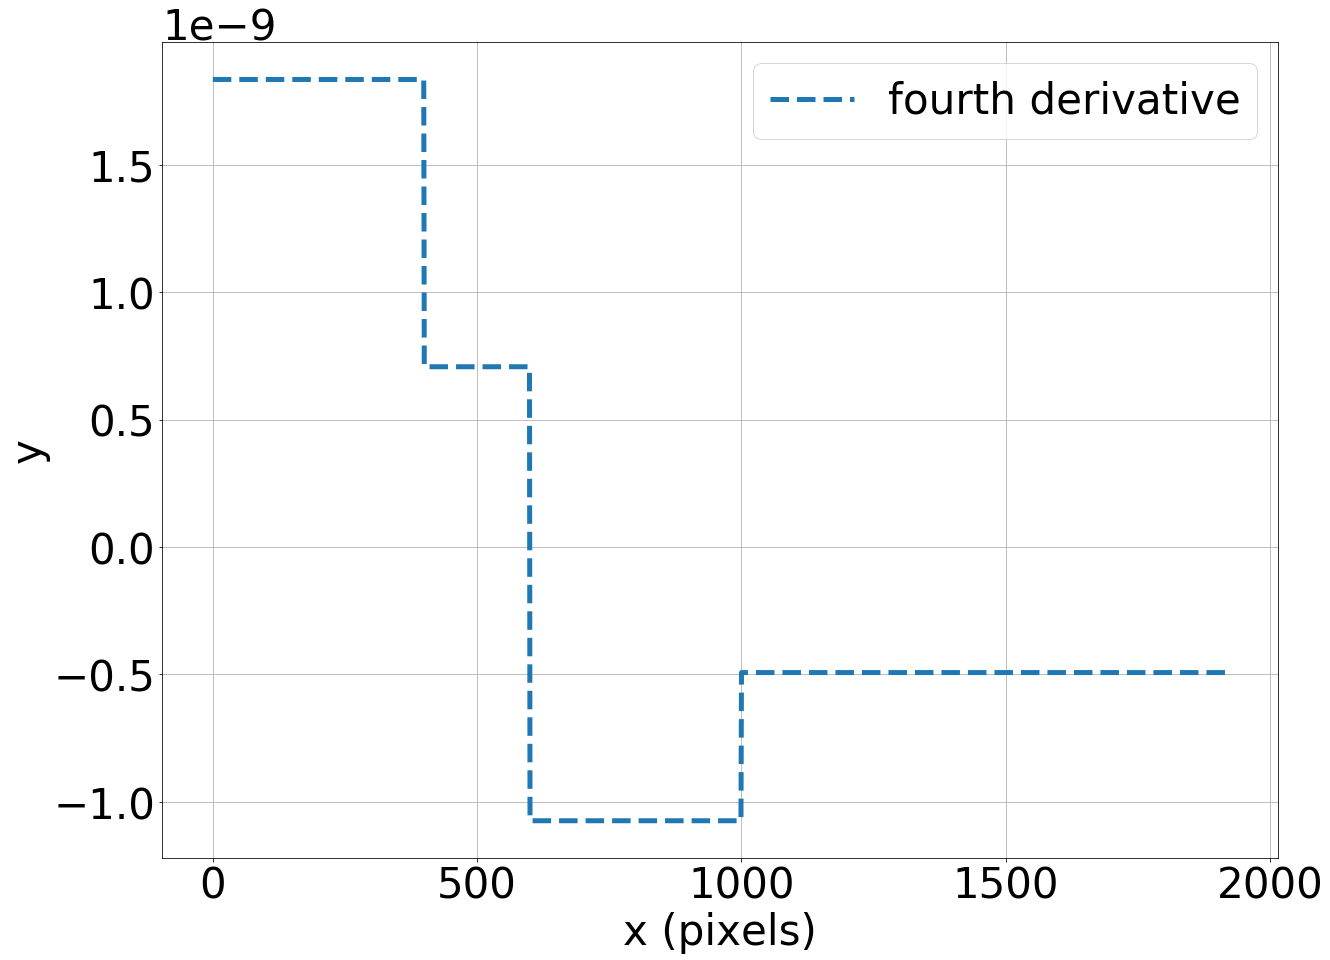

In [25]:
plt.figure(figsize=(20,15))

plt.plot(coordinates[:, 0], -np.array([fourth_derivative(x) for x in coordinates[:, 0]]), "--", linewidth=5, 
        label="fourth derivative")
plt.legend()
plt.xlabel("x (pixels)")
plt.ylabel("y")
plt.grid()

plt.show()